# Module 2: Car Price Prediction Project
Data www.kaggle.com/CooperUnion/cardataset

In [1]:
import numpy as np
import pandas as pd

## Data Preparation

In [2]:
data = 'https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-02-car-price/data.csv'

In [2]:
# !wget $data

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [5]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

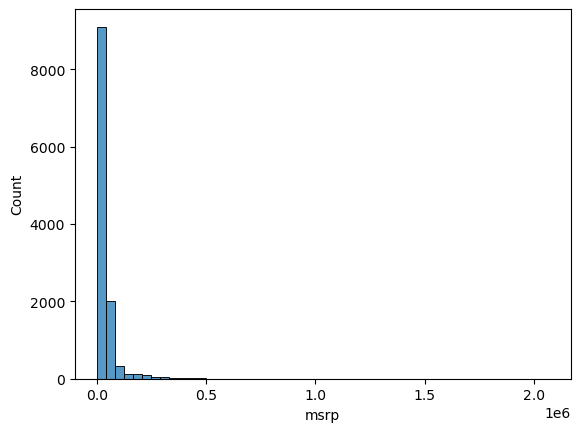

In [7]:
sns.histplot(df.msrp, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

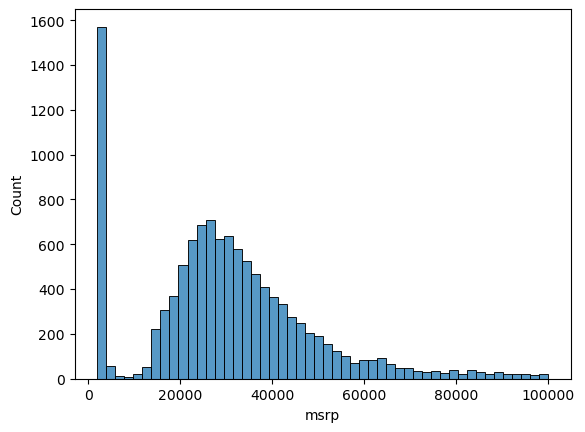

In [8]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [9]:
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

<Axes: xlabel='msrp', ylabel='Count'>

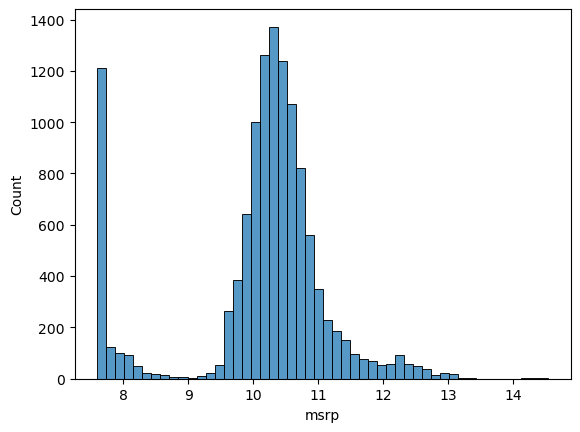

In [10]:
price_logs = np.log1p(df.msrp)
sns.histplot(price_logs, bins=50)

In [11]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Module 2-4: Setting up the validation framework

Split data into train, validation, and test dataset.
60% train, 20% validation, 20% test

In [6]:
df = pd.read_csv("./data.csv")
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [12]:
int(len(df)*0.2)

2382

In [13]:
df.head()

make       model  year             engine_fuel_type  engine_hp  \
0  bmw  1_series_m  2011  premium_unleaded_(required)      335.0   
1  bmw    1_series  2011  premium_unleaded_(required)      300.0   
2  bmw    1_series  2011  premium_unleaded_(required)      300.0   
3  bmw    1_series  2011  premium_unleaded_(required)      230.0   
4  bmw    1_series  2011  premium_unleaded_(required)      230.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            manual  rear_wheel_drive              2.0   
1               6.0            manual  rear_wheel_drive              2.0   
2               6.0            manual  rear_wheel_drive              2.0   
3               6.0            manual  rear_wheel_drive              2.0   
4               6.0            manual  rear_wheel_drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  factory_tuner,luxury,high-performance      compact         coupe   
1                     luxury,performance      compact   convertible   
2                luxury,high-performance      compact         coupe   
3                     luxury,performance      compact         coupe   
4                                 luxury      compact   convertible   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [7]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = int(n * 0.6)        

In [8]:
n, n_val + n_test + n_train

(11914, 11912)

In [9]:
n_train = n - n_val - n_test

In [10]:
n, n_val + n_test + n_train

(11914, 11914)

In [29]:
df.iloc[ [0, 1, 2] ]

make       model  year             engine_fuel_type  engine_hp  \
0  bmw  1_series_m  2011  premium_unleaded_(required)      335.0   
1  bmw    1_series  2011  premium_unleaded_(required)      300.0   
2  bmw    1_series  2011  premium_unleaded_(required)      300.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            manual  rear_wheel_drive              2.0   
1               6.0            manual  rear_wheel_drive              2.0   
2               6.0            manual  rear_wheel_drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  factory_tuner,luxury,high-performance      compact         coupe   
1                     luxury,performance      compact   convertible   
2                luxury,high-performance      compact         coupe   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350

In [31]:
df.iloc[:10]

make       model  year             engine_fuel_type  engine_hp  \
0  bmw  1_series_m  2011  premium_unleaded_(required)      335.0   
1  bmw    1_series  2011  premium_unleaded_(required)      300.0   
2  bmw    1_series  2011  premium_unleaded_(required)      300.0   
3  bmw    1_series  2011  premium_unleaded_(required)      230.0   
4  bmw    1_series  2011  premium_unleaded_(required)      230.0   
5  bmw    1_series  2012  premium_unleaded_(required)      230.0   
6  bmw    1_series  2012  premium_unleaded_(required)      300.0   
7  bmw    1_series  2012  premium_unleaded_(required)      300.0   
8  bmw    1_series  2012  premium_unleaded_(required)      230.0   
9  bmw    1_series  2013  premium_unleaded_(required)      230.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            manual  rear_wheel_drive              2.0   
1               6.0            manual  rear_wheel_drive              2.0   
2               6.0            manual  rear_wheel_drive              2.0   
3               6.0            manual  rear_wheel_drive              2.0   
4               6.0            manual  rear_wheel_drive              2.0   
5               6.0            manual  rear_wheel_drive              2.0   
6               6.0            manual  rear_wheel_drive              2.0   
7               6.0            manual  rear_wheel_drive              2.0   
8               6.0            manual  rear_wheel_drive              2.0   
9               6.0            manual  rear_wheel_drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  factory_tuner,luxury,high-performance      compact         coupe   
1                     luxury,performance      compact   convertible   
2                luxury,high-performance      compact         coupe   
3                     luxury,performance      compact         coupe   
4                                 luxury      compact   convertible   
5                     luxury,performance      compact         coupe   
6                     luxury,performance      compact   convertible   
7                luxury,high-performance      compact         coupe   
8                                 luxury      compact   convertible   
9                                 luxury      compact   convertible   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500  
5           28        18        3916  31200  
6           26        17        3916  44100  
7           28        20        3916  39300  
8           28        18        3916  36900  
9           27        18        3916  37200

In [33]:
df.iloc[10:20]

make     model  year             engine_fuel_type  engine_hp  \
10   bmw  1_series  2013  premium_unleaded_(required)      300.0   
11   bmw  1_series  2013  premium_unleaded_(required)      230.0   
12   bmw  1_series  2013  premium_unleaded_(required)      300.0   
13   bmw  1_series  2013  premium_unleaded_(required)      230.0   
14   bmw  1_series  2013  premium_unleaded_(required)      230.0   
15   bmw  1_series  2013  premium_unleaded_(required)      320.0   
16   bmw  1_series  2013  premium_unleaded_(required)      320.0   
17  audi       100  1992             regular_unleaded      172.0   
18  audi       100  1992             regular_unleaded      172.0   
19  audi       100  1992             regular_unleaded      172.0   

    engine_cylinders transmission_type      driven_wheels  number_of_doors  \
10               6.0            manual   rear_wheel_drive              2.0   
11               6.0            manual   rear_wheel_drive              2.0   
12               6.0            manual   rear_wheel_drive              2.0   
13               6.0            manual   rear_wheel_drive              2.0   
14               6.0            manual   rear_wheel_drive              2.0   
15               6.0            manual   rear_wheel_drive              2.0   
16               6.0            manual   rear_wheel_drive              2.0   
17               6.0            manual  front_wheel_drive              4.0   
18               6.0            manual  front_wheel_drive              4.0   
19               6.0         automatic    all_wheel_drive              4.0   

            market_category vehicle_size vehicle_style  highway_mpg  city_mpg  \
10  luxury,high-performance      compact         coupe           28        20   
11       luxury,performance      compact         coupe           28        19   
12       luxury,performance      compact   convertible           28        19   
13                   luxury      compact   convertible           28        19   
14       luxury,performance      compact         coupe           28        19   
15  luxury,high-performance      compact   convertible           25        18   
16  luxury,high-performance      compact         coupe           28        20   
17                   luxury      midsize         sedan           24        17   
18                   luxury      midsize         sedan           24        17   
19                   luxury      midsize         wagon           20        16   

    popularity   msrp  
10        3916  39600  
11        3916  31500  
12        3916  44400  
13        3916  37200  
14        3916  31500  
15        3916  48250  
16        3916  43550  
17        3105   2000  
18        3105   2000  
19        3105   2000

In [11]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:(n_val + n_test)]
df_train = df.iloc[(n_val + n_test):]

In [12]:
df.iloc[ [10, 0, 3] ]

make       model  year             engine_fuel_type  engine_hp  \
10  bmw    1_series  2013  premium_unleaded_(required)      300.0   
0   bmw  1_series_m  2011  premium_unleaded_(required)      335.0   
3   bmw    1_series  2011  premium_unleaded_(required)      230.0   

    engine_cylinders transmission_type     driven_wheels  number_of_doors  \
10               6.0            manual  rear_wheel_drive              2.0   
0                6.0            manual  rear_wheel_drive              2.0   
3                6.0            manual  rear_wheel_drive              2.0   

                          market_category vehicle_size vehicle_style  \
10                luxury,high-performance      compact         coupe   
0   factory_tuner,luxury,high-performance      compact         coupe   
3                      luxury,performance      compact         coupe   

    highway_mpg  city_mpg  popularity   msrp  
10           28        20        3916  39600  
0            26        19        3916  46135  
3            28        18        3916  29450

In [36]:
df_train = df.iloc[ n_train: ]
df_val = df.iloc[ n_train : (n_train + n_val) ]
df_test = df.iloc[ (n_train+n_val): ]

In [14]:
idx = np.arange(n)

In [15]:
np.random.seed(2)
np.random.shuffle(idx)

In [47]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336], shape=(11914,))

In [16]:
df_train = df.iloc[ idx[:n_train] ]
df_val = df.iloc[ idx[n_train : (n_train + n_val)] ]
df_test = df.iloc[ idx[(n_train+n_val): ] ]

In [17]:
df_train.head()

make    model  year          engine_fuel_type  engine_hp  \
2735    chevrolet   cobalt  2008          regular_unleaded      148.0   
6720       toyota   matrix  2012          regular_unleaded      132.0   
5878       subaru  impreza  2016          regular_unleaded      148.0   
11190  volkswagen  vanagon  1991          regular_unleaded       90.0   
4554         ford    f-150  2017  flex-fuel_(unleaded/e85)      385.0   

       engine_cylinders transmission_type      driven_wheels  number_of_doors  \
2735                4.0            manual  front_wheel_drive              2.0   
6720                4.0         automatic  front_wheel_drive              4.0   
5878                4.0         automatic    all_wheel_drive              4.0   
11190               4.0            manual   rear_wheel_drive              3.0   
4554                8.0         automatic   four_wheel_drive              4.0   

      market_category vehicle_size      vehicle_style  highway_mpg  city_mpg  \
2735              NaN      compact              coupe           33        24   
6720        hatchback      compact      4dr_hatchback           32        25   
5878        hatchback      compact      4dr_hatchback           37        28   
11190             NaN        large  passenger_minivan           18        16   
4554        flex_fuel        large    crew_cab_pickup           21        15   

       popularity   msrp  
2735         1385  14410  
6720         2031  19685  
5878          640  19795  
11190         873   2000  
4554         5657  56260

In [52]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [54]:
df_train.head()

make    model  year          engine_fuel_type  engine_hp  \
0   chevrolet   cobalt  2008          regular_unleaded      148.0   
1      toyota   matrix  2012          regular_unleaded      132.0   
2      subaru  impreza  2016          regular_unleaded      148.0   
3  volkswagen  vanagon  1991          regular_unleaded       90.0   
4        ford    f-150  2017  flex-fuel_(unleaded/e85)      385.0   

   engine_cylinders transmission_type      driven_wheels  number_of_doors  \
0               4.0            manual  front_wheel_drive              2.0   
1               4.0         automatic  front_wheel_drive              4.0   
2               4.0         automatic    all_wheel_drive              4.0   
3               4.0            manual   rear_wheel_drive              3.0   
4               8.0         automatic   four_wheel_drive              4.0   

  market_category vehicle_size      vehicle_style  highway_mpg  city_mpg  \
0             NaN      compact              coupe           33        24   
1       hatchback      compact      4dr_hatchback           32        25   
2       hatchback      compact      4dr_hatchback           37        28   
3             NaN        large  passenger_minivan           18        16   
4       flex_fuel        large    crew_cab_pickup           21        15   

   popularity   msrp  
0        1385  14410  
1        2031  19685  
2         640  19795  
3         873   2000  
4        5657  56260

In [19]:
y_train = np.log1p(df_train.msrp).values
y_val = np.log1p(df_val.msrp).values
y_test = np.log1p(df_test.msrp).values

In [20]:
## remove msrp 
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## 2.5 Linear Regression

In [61]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [ ]:
# HP, city_mpg, popularity
#[453, 11, 86]

In [66]:
w0 = 7.17
w = [0.01, 0.04, 0.002] ## weight for each feature
def linear_regression(xi):
    n = len(xi) # n features
    pred = w0

    for j in range(n):
        pred = pred + xi[j]*w[j]

    return pred

In [67]:
linear_regression( [453, 11, 86 ] )

12.312

In [68]:
np.log(12.312)

np.float64(2.510574396536578)

In [71]:
np.exp(12.312) - 1

np.float64(222347.2221101062)

In [72]:
np.expm1(12.312)

np.float64(222347.2221101062)

## 2.6 Linear regression vector form

In [21]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]

    return res

In [22]:
def linear_regression(xi):
    return w0 + dot(xi, w)
    

In [24]:
w0 = 7.17
w = [0.01, 0.04, 0.002] ## weight for each feature
linear_regression([453, 11, 86 ])

12.312000000000001

In [25]:
w_new = [w0] + w
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)
    

In [82]:
linear_regression([453, 11, 86 ])

12.312

In [26]:
w0 = 7.17
w = [0.01, 0.04, 0.002] ## weight for each feature
xi = [453, 11, 86]

In [27]:
x1 = [ 1, 148, 24, 1385 ]
x2 = [ 1, 132, 25, 2031 ] 
x10 = [ 1, 453, 11, 86 ]

X = [ x1, x2, x10]
X

[[1, 148, 24, 1385], [1, 132, 25, 2031], [1, 453, 11, 86]]

In [28]:
X = np.array(X)

In [29]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [30]:
X.dot(w_new)

array([12.38 , 13.552, 12.312])

In [31]:
def linear_regression(X):
    return X.dot(w_new)

In [32]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

## 2.7 Training a linear regression model

In [92]:
X ## more columns than rows -> can't estimate

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [33]:
X = [ 
[ 148, 24, 1385 ],
[ 132, 25, 2031 ] ,
[ 453, 11, 86 ],
[ 158, 24, 185 ],
[ 172, 25, 201 ] ,
[ 413, 11, 86 ],
[ 38, 54, 185 ],
[ 142, 25, 431 ] ,
[ 453, 31, 86 ]
]

X = np.array(X)
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000 ]
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [ ]:
## (Xt X)^-1 Xt y

In [34]:
XTX = X.T.dot(X) ## Gram matrix

In [35]:
XTX_inv = np.linalg.inv(XTX)

In [36]:
XTX_inv.dot(XTX)

array([[ 1.00000000e+00, -7.31626528e-18, -2.48044920e-16],
       [-9.40972289e-16,  1.00000000e+00,  5.91969982e-15],
       [ 3.42839762e-17,  9.23133564e-19,  1.00000000e+00]])

In [37]:
XTX_inv.dot(X.T).dot(y)

array([ 26.08419498, 286.12285934,   3.93813107])

In [38]:
w = XTX_inv.dot(X.T).dot(y)

In [39]:
w

array([ 26.08419498, 286.12285934,   3.93813107])

In [40]:
## add 1 to X matrix
ones = np.ones(X.shape[0])

In [41]:
X = np.column_stack( [ ones, X ] )

In [42]:
XTX = X.T.dot(X) 
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)

In [43]:
w0 = w_full[0]
w = w_full[1:]

In [44]:
w0, w

(np.float64(25844.75405576683),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

In [45]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack( [ ones, X ] )
    XTX = X.T.dot(X) 
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [46]:
train_linear_regression(X, y)

(np.float64(2.0460143454602068e+20),
 array([1.26525728e+20, 8.71025484e+01, 2.59709297e+02, 0.00000000e+00]))

## 2.8 Car price baseline model

In [47]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [48]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [49]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [50]:
df_train[base]

engine_hp  engine_cylinders  highway_mpg  city_mpg  popularity
0         148.0               4.0           33        24        1385
1         132.0               4.0           32        25        2031
2         148.0               4.0           37        28         640
3          90.0               4.0           18        16         873
4         385.0               8.0           21        15        5657
...         ...               ...          ...       ...         ...
7145      300.0               6.0           31        20        3916
7146      210.0               4.0           30        24         873
7147      285.0               6.0           22        17         549
7148      563.0              12.0           21        13          86
7149      200.0               4.0           31        22         873

[7150 rows x 5 columns]

In [51]:
X_train = df_train[base].values ## extracts numpy array

In [52]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

In [53]:
train_linear_regression(X_train, y_train)

(np.float64(nan), array([nan, nan, nan, nan, nan]))

In [54]:
df_train[base].isnull().sum() ## missing values

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [55]:
df_train[base].fillna(0).isnull().sum() ## filling with 0s, not the best way but can be a practical solution

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [56]:
X_train = df_train[base].fillna(0).values

In [57]:
w0, w = train_linear_regression(X_train, y_train)
w0, w

(np.float64(7.927257388070062),
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [58]:
y_train_pred = w0 + X_train.dot(w)
y_train_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111], shape=(7150,))

<Axes: ylabel='Count'>

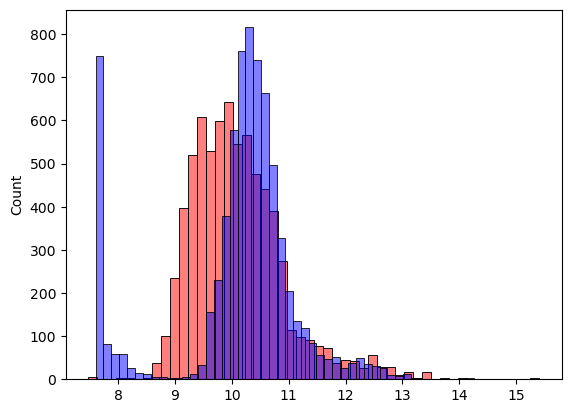

In [59]:
## plot to see if it is similar to original y
sns.histplot(y_train_pred, color='red', bins=50, alpha=0.5)
sns.histplot(y_train, color='blue', bins=50, alpha=0.5)

Prediction is lower than actual values in general. Suggesting the model is not ideal. How to quantify?

## 2.9 RMSE: root mean squared error

In [60]:
y_train_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111], shape=(7150,))

In [61]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [62]:
rmse(y_train, y_train_pred)

np.float64(0.7554192603920132)

In [63]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [64]:
rmse(y_train, y_train_pred)

np.float64(0.7554192603920132)

## 2.10 Validating the model

In [ ]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_train_pred = w0 + X_train.dot(w)

rmse(y_train, y_train_pred)

In [65]:
def prepare_X(df):
    df_num = df[base].fillna(0)
    X = df_num.values
    return X
    

In [67]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

y_train_pred = w0 + X_train.dot(w)

rmse(y_train, y_train_pred)

np.float64(0.7554192603920132)

In [69]:
X_val = prepare_X(df_val)
y_val_pred = w0 + X_val.dot(w)
rmse(y_val, y_val_pred)

np.float64(0.7616530991301577)

## 2.11 Simple feature engineering

In [72]:
df_train.year.max()

np.int64(2017)

In [73]:
2017 - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [82]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base + ['age']
    df_num = df[features].fillna(0)
    X = df_num.values
    return X

In [83]:
X_train = prepare_X(df_train)

In [84]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [85]:
X_train

array([[1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00],
       [1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03, 5.000e+00],
       [1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02, 1.000e+00],
       ...,
       [2.850e+02, 6.000e+00, 2.200e+01, 1.700e+01, 5.490e+02, 2.000e+00],
       [5.630e+02, 1.200e+01, 2.100e+01, 1.300e+01, 8.600e+01, 3.000e+00],
       [2.000e+02, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02, 0.000e+00]],
      shape=(7150, 6))

In [90]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

y_train_pred = w0 + X_train.dot(w)

rmse(y_train, y_train_pred)

np.float64(0.5175055465840046)

In [93]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5172055461058291)

<Axes: ylabel='Count'>

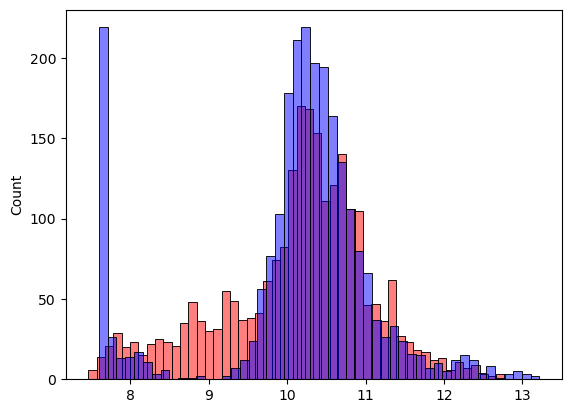

In [94]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

## 2.12 Categorical variables

In [95]:
df_train

make        model  year                engine_fuel_type  \
0       chevrolet       cobalt  2008                regular_unleaded   
1          toyota       matrix  2012                regular_unleaded   
2          subaru      impreza  2016                regular_unleaded   
3      volkswagen      vanagon  1991                regular_unleaded   
4            ford        f-150  2017        flex-fuel_(unleaded/e85)   
...           ...          ...   ...                             ...   
7145          bmw     4_series  2015     premium_unleaded_(required)   
7146   volkswagen       beetle  2015  premium_unleaded_(recommended)   
7147          gmc  sierra_1500  2015        flex-fuel_(unleaded/e85)   
7148  rolls-royce        ghost  2014     premium_unleaded_(required)   
7149   volkswagen           cc  2017  premium_unleaded_(recommended)   

      engine_hp  engine_cylinders transmission_type      driven_wheels  \
0         148.0               4.0            manual  front_wheel_drive   
1         132.0               4.0         automatic  front_wheel_drive   
2         148.0               4.0         automatic    all_wheel_drive   
3          90.0               4.0            manual   rear_wheel_drive   
4         385.0               8.0         automatic   four_wheel_drive   
...         ...               ...               ...                ...   
7145      300.0               6.0         automatic   rear_wheel_drive   
7146      210.0               4.0  automated_manual  front_wheel_drive   
7147      285.0               6.0         automatic   four_wheel_drive   
7148      563.0              12.0         automatic   rear_wheel_drive   
7149      200.0               4.0  automated_manual  front_wheel_drive   

      number_of_doors            market_category vehicle_size  \
0                 2.0                        NaN      compact   
1                 4.0                  hatchback      compact   
2                 4.0                  hatchback      compact   
3                 3.0                        NaN        large   
4                 4.0                  flex_fuel        large   
...               ...                        ...          ...   
7145              2.0         luxury,performance      midsize   
7146              2.0      hatchback,performance      compact   
7147              4.0                  flex_fuel        large   
7148              4.0  exotic,luxury,performance        large   
7149              4.0                performance      midsize   

            vehicle_style  highway_mpg  city_mpg  popularity  
0                   coupe           33        24        1385  
1           4dr_hatchback           32        25        2031  
2           4dr_hatchback           37        28         640  
3       passenger_minivan           18        16         873  
4         crew_cab_pickup           21        15        5657  
...                   ...          ...       ...         ...  
7145          convertible           31        20        3916  
7146        2dr_hatchback           30        24         873  
7147  extended_cab_pickup           22        17         549  
7148                sedan           21        13          86  
7149                sedan           31        22         873  

[7150 rows x 15 columns]

In [96]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [98]:
df_train.number_of_doors.unique() ## this variable is actually a categorical variable

array([ 2.,  4.,  3., nan])

In [99]:
df_train.number_of_doors == 2

0        True
1       False
2       False
3       False
4       False
        ...  
7145     True
7146     True
7147    False
7148    False
7149    False
Name: number_of_doors, Length: 7150, dtype: bool

In [102]:
df_train['num_doors_2'] = (df_train.number_of_doors == 2).astype('int')
df_train['num_doors_3'] = (df_train.number_of_doors == 3).astype('int')
df_train['num_doors_4'] = (df_train.number_of_doors == 4).astype('int')

In [103]:
for v in [2, 3, 4]:
    df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')

In [104]:
df_train

make        model  year                engine_fuel_type  \
0       chevrolet       cobalt  2008                regular_unleaded   
1          toyota       matrix  2012                regular_unleaded   
2          subaru      impreza  2016                regular_unleaded   
3      volkswagen      vanagon  1991                regular_unleaded   
4            ford        f-150  2017        flex-fuel_(unleaded/e85)   
...           ...          ...   ...                             ...   
7145          bmw     4_series  2015     premium_unleaded_(required)   
7146   volkswagen       beetle  2015  premium_unleaded_(recommended)   
7147          gmc  sierra_1500  2015        flex-fuel_(unleaded/e85)   
7148  rolls-royce        ghost  2014     premium_unleaded_(required)   
7149   volkswagen           cc  2017  premium_unleaded_(recommended)   

      engine_hp  engine_cylinders transmission_type      driven_wheels  \
0         148.0               4.0            manual  front_wheel_drive   
1         132.0               4.0         automatic  front_wheel_drive   
2         148.0               4.0         automatic    all_wheel_drive   
3          90.0               4.0            manual   rear_wheel_drive   
4         385.0               8.0         automatic   four_wheel_drive   
...         ...               ...               ...                ...   
7145      300.0               6.0         automatic   rear_wheel_drive   
7146      210.0               4.0  automated_manual  front_wheel_drive   
7147      285.0               6.0         automatic   four_wheel_drive   
7148      563.0              12.0         automatic   rear_wheel_drive   
7149      200.0               4.0  automated_manual  front_wheel_drive   

      number_of_doors            market_category vehicle_size  \
0                 2.0                        NaN      compact   
1                 4.0                  hatchback      compact   
2                 4.0                  hatchback      compact   
3                 3.0                        NaN        large   
4                 4.0                  flex_fuel        large   
...               ...                        ...          ...   
7145              2.0         luxury,performance      midsize   
7146              2.0      hatchback,performance      compact   
7147              4.0                  flex_fuel        large   
7148              4.0  exotic,luxury,performance        large   
7149              4.0                performance      midsize   

            vehicle_style  highway_mpg  city_mpg  popularity  num_doors_2  \
0                   coupe           33        24        1385            1   
1           4dr_hatchback           32        25        2031            0   
2           4dr_hatchback           37        28         640            0   
3       passenger_minivan           18        16         873            0   
4         crew_cab_pickup           21        15        5657            0   
...                   ...          ...       ...         ...          ...   
7145          convertible           31        20        3916            1   
7146        2dr_hatchback           30        24         873            1   
7147  extended_cab_pickup           22        17         549            0   
7148                sedan           21        13          86            0   
7149                sedan           31        22         873            0   

      num_doors_3  num_doors_4  
0               0            0  
1               0            1  
2               0            1  
3               1            0  
4               0            1  
...           ...          ...  
7145            0            0  
7146            0            0  
7147            0            1  
7148            0            1  
7149            0            1  

[7150 rows x 18 columns]

In [105]:
'num_doors_%s' % 3

'num_doors_3'

In [122]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base + ['age']
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' %v)

    df_num = df[features].fillna(0)
    X = df_num.values
    return X

In [107]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]], shape=(7150, 9))

In [125]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

y_train_pred = w0 + X_train.dot(w)

rmse(y_train, y_train_pred)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5157995641501765)

In [112]:
df_val

make                    model  year  \
0         chevrolet                 colorado  2015   
1     mercedes-benz                  e-class  2017   
2              ford                    focus  2017   
3             acura                      tlx  2016   
4        volkswagen       beetle_convertible  2016   
...             ...                      ...   ...   
2377          volvo                      v60  2015   
2378       maserati  granturismo_convertible  2015   
2379       cadillac          escalade_hybrid  2013   
2380     mitsubishi                   lancer  2016   
2381            kia                  sorento  2015   

                    engine_fuel_type  engine_hp  engine_cylinders  \
0                   regular_unleaded      200.0               4.0   
1        premium_unleaded_(required)      241.0               4.0   
2           flex-fuel_(unleaded/e85)      160.0               4.0   
3     premium_unleaded_(recommended)      290.0               6.0   
4                   regular_unleaded      170.0               4.0   
...                              ...        ...               ...   
2377                regular_unleaded      240.0               4.0   
2378     premium_unleaded_(required)      444.0               8.0   
2379                regular_unleaded      332.0               8.0   
2380                regular_unleaded      148.0               4.0   
2381                regular_unleaded      290.0               6.0   

     transmission_type      driven_wheels  number_of_doors  \
0            automatic   four_wheel_drive              4.0   
1            automatic    all_wheel_drive              4.0   
2               manual  front_wheel_drive              4.0   
3            automatic  front_wheel_drive              4.0   
4            automatic  front_wheel_drive              2.0   
...                ...                ...              ...   
2377         automatic  front_wheel_drive              4.0   
2378         automatic   rear_wheel_drive              2.0   
2379         automatic   rear_wheel_drive              4.0   
2380            manual  front_wheel_drive              4.0   
2381         automatic  front_wheel_drive              4.0   

                     market_category vehicle_size        vehicle_style  \
0                                NaN      compact  extended_cab_pickup   
1                             luxury      midsize                sedan   
2                          flex_fuel      compact                sedan   
3                             luxury      midsize                sedan   
4                                NaN      compact          convertible   
...                              ...          ...                  ...   
2377                          luxury      midsize                wagon   
2378  exotic,luxury,high-performance      midsize          convertible   
2379                   luxury,hybrid        large              4dr_suv   
2380                             NaN      compact                sedan   
2381                       crossover      midsize              4dr_suv   

      highway_mpg  city_mpg  popularity  
0              25        19        1385  
1              29        22         617  
2              36        26        5657  
3              34        21         204  
4              34        25         873  
...           ...       ...         ...  
2377           37        25         870  
2378           20        13         238  
2379           23        20        1624  
2380           34        24         436  
2381           25        18        1720  

[2382 rows x 15 columns]

In [126]:
df.make.value_counts()

make
chevrolet        1123
ford              881
volkswagen        809
toyota            746
dodge             626
nissan            558
gmc               515
honda             449
mazda             423
cadillac          397
mercedes-benz     353
suzuki            351
bmw               334
infiniti          330
audi              328
hyundai           303
volvo             281
subaru            256
acura             252
kia               231
mitsubishi        213
lexus             202
buick             196
chrysler          187
pontiac           186
lincoln           164
oldsmobile        150
land_rover        143
porsche           136
saab              111
aston_martin       93
plymouth           82
bentley            74
ferrari            69
fiat               62
scion              60
maserati           58
lamborghini        52
rolls-royce        31
lotus              29
tesla              18
hummer             17
maybach            16
alfa_romeo          5
mclaren             5
spyke

In [127]:
df.make.value_counts().head()

make
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: count, dtype: int64

In [130]:
makes = list(df.make.value_counts().head().index)

In [131]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base + ['age']
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)

    df_num = df[features].fillna(0)
    X = df_num.values
    return X

In [132]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

y_train_pred = w0 + X_train.dot(w)

rmse(y_train, y_train_pred)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5076038849556025)

In [134]:
df_train.engine_fuel_type.unique()

array(['regular_unleaded', 'flex-fuel_(unleaded/e85)',
       'premium_unleaded_(required)', 'premium_unleaded_(recommended)',
       'diesel', 'flex-fuel_(premium_unleaded_required/e85)', 'electric',
       'flex-fuel_(unleaded/natural_gas)',
       'flex-fuel_(premium_unleaded_recommended/e85)', nan], dtype=object)

In [137]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 
    'market_category', 'vehicle_size', 'vehicle_style'
]

In [165]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)


In [166]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [202]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v) )

    #print(features)
    df_num = df[features].fillna(0)
    X = df_num.values
    return X

In [168]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'age', 'num_doors_2', 'num_doors_3', 'num_doors_4', 'make_chevrolet', 'make_ford', 'make_volkswagen', 'make_toyota', 'make_dodge', 'engine_fuel_type_regular_unleaded', 'engine_fuel_type_premium_unleaded_(required)', 'engine_fuel_type_premium_unleaded_(recommended)', 'engine_fuel_type_flex-fuel_(unleaded/e85)', 'engine_fuel_type_diesel', 'transmission_type_automatic', 'transmission_type_manual', 'transmission_type_automated_manual', 'transmission_type_direct_drive', 'transmission_type_unknown', 'driven_wheels_front_wheel_drive', 'driven_wheels_rear_wheel_drive', 'driven_wheels_all_wheel_drive', 'driven_wheels_four_wheel_drive', 'market_category_crossover', 'market_category_flex_fuel', 'market_category_luxury', 'market_category_luxury,performance', 'market_category_hatchback', 'vehicle_size_compact', 'vehicle_size_midsize', 'vehicle_size_large', 'vehicle_style_sedan', 'vehicle_style_4dr_suv', 'vehicle_style_coupe'

In [173]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

y_train_pred = w0 + X_train.dot(w)

print(rmse(y_train, y_train_pred))

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print(rmse(y_val, y_pred))

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'age', 'num_doors_2', 'num_doors_3', 'num_doors_4', 'make_chevrolet', 'make_ford', 'make_volkswagen', 'make_toyota', 'make_dodge', 'engine_fuel_type_regular_unleaded', 'engine_fuel_type_premium_unleaded_(required)', 'engine_fuel_type_premium_unleaded_(recommended)', 'engine_fuel_type_flex-fuel_(unleaded/e85)', 'engine_fuel_type_diesel', 'transmission_type_automatic', 'transmission_type_manual', 'transmission_type_automated_manual', 'transmission_type_direct_drive', 'transmission_type_unknown', 'driven_wheels_front_wheel_drive', 'driven_wheels_rear_wheel_drive', 'driven_wheels_all_wheel_drive', 'driven_wheels_four_wheel_drive', 'market_category_crossover', 'market_category_flex_fuel', 'market_category_luxury', 'market_category_luxury,performance', 'market_category_hatchback', 'vehicle_size_compact', 'vehicle_size_midsize', 'vehicle_size_large', 'vehicle_style_sedan', 'vehicle_style_4dr_suv', 'vehicle_style_coupe'

In [174]:
w0

np.float64(7.718018928092787e+16)

## 2.13 Regularization

Inverse of (XtX) doesn't exist specially if there are duplicated columns. More specifically, if one column is a linear combination of other columns, can't find the inverse.

In [176]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5]
]
X = np.array(X)
X

array([[4, 4, 4],
       [3, 5, 5],
       [5, 1, 1],
       [5, 4, 4],
       [7, 5, 5],
       [4, 5, 5]])

In [177]:
X.T.dot(X)

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])

In [179]:
np.linalg.inv(X.T.dot(X)) ## Singular matrix

LinAlgError: Singular matrix

In [180]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00000001]
]
X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [184]:
XTX_inv = np.linalg.inv(X.T.dot(X)) 
y = [1, 2, 3, 1, 2, 3]

In [183]:
XTX_inv

array([[ 3.85321698e-02,  1.20696663e+05, -1.20696696e+05],
       [ 1.20696640e+05, -2.74658839e+14,  2.74658839e+14],
       [-1.20696680e+05,  2.74658839e+14, -2.74658839e+14]])

In [185]:
XTX_inv.dot(X.T).dot(y)

array([ 6.24269892e-01,  3.44329390e+06, -3.44329299e+06])

Coefficients become very large. To solve this problem, add a small number to diagnoal elements of the matrix (XtX)

In [186]:
XTX = [
    [ 1, 2, 2],
    [2, 1, 1],
    [2, 1, 1]
]
    

In [187]:
np.linalg.inv(XTX)

LinAlgError: Singular matrix

In [191]:
XTX = [
    [ 1, 2, 2],
    [2, 1, 1.00001],
    [2, 1.00001, 1]
]
np.linalg.inv(XTX)

array([[-3.33335556e-01,  3.33333889e-01,  3.33333889e-01],
       [ 3.33333889e-01, -5.00000833e+04,  4.99999167e+04],
       [ 3.33333889e-01,  4.99999167e+04, -5.00000833e+04]])

It still generates a very large number in the inverse matrix

In [189]:
XTX = [
    [ 1.01, 2, 2],
    [2, 1.01, 1.00001],
    [2, 1.00001, 1.01]
]
np.linalg.inv(XTX)

array([[ -0.3366913 ,   0.33501455,   0.33501455],
       [  0.33501455,  49.96545888, -50.13464122],
       [  0.33501455, -50.13464122,  49.96545888]])

By adding ".01" it controls the amplitude of coefficients. The larger the number is, the more control it has.

In [190]:
XTX = [
    [ 1.0001, 2, 2],
    [2, 1.0001, 1.00001],
    [2, 1.00001, 1.0001]
]
np.linalg.inv(XTX)

array([[-3.33368891e-01,  3.33350557e-01,  3.33350557e-01],
       [ 3.33350557e-01,  5.55547221e+03, -5.55563890e+03],
       [ 3.33350557e-01, -5.55563890e+03,  5.55547221e+03]])

In [195]:
XTX = [
    [ 1, 2, 2],
    [2, 1, 1.00001],
    [2, 1.00001, 1]
]
XTX = XTX + np.eye(3) * 0.01
np.linalg.inv(XTX)

array([[ -0.3366913 ,   0.33501455,   0.33501455],
       [  0.33501455,  49.96545888, -50.13464122],
       [  0.33501455, -50.13464122,  49.96545888]])

`0.01` is a parameter to determine

In [200]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack( [ ones, X ] )
    XTX = X.T.dot(X)
    XTX = XTX + np.eye(XTX.shape[0]) * r
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [201]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_train_pred = w0 + X_train.dot(w)

print(rmse(y_train, y_train_pred))

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print(rmse(y_val, y_pred))

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'age', 'num_doors_2', 'num_doors_3', 'num_doors_4', 'make_chevrolet', 'make_ford', 'make_volkswagen', 'make_toyota', 'make_dodge', 'engine_fuel_type_regular_unleaded', 'engine_fuel_type_premium_unleaded_(required)', 'engine_fuel_type_premium_unleaded_(recommended)', 'engine_fuel_type_flex-fuel_(unleaded/e85)', 'engine_fuel_type_diesel', 'transmission_type_automatic', 'transmission_type_manual', 'transmission_type_automated_manual', 'transmission_type_direct_drive', 'transmission_type_unknown', 'driven_wheels_front_wheel_drive', 'driven_wheels_rear_wheel_drive', 'driven_wheels_all_wheel_drive', 'driven_wheels_four_wheel_drive', 'market_category_crossover', 'market_category_flex_fuel', 'market_category_luxury', 'market_category_luxury,performance', 'market_category_hatchback', 'vehicle_size_compact', 'vehicle_size_midsize', 'vehicle_size_large', 'vehicle_style_sedan', 'vehicle_style_4dr_suv', 'vehicle_style_coupe'

Regularization improves the high RMSE, high coefficient problem but also better RMSE. Optimal `r` needs to be determined.

## 2.14 Tuning the model

In [203]:
for r in [0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    y_train_pred = w0 + X_train.dot(w)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    print(r, w0, rmse(y_val, y_pred))

0 7.718018928092787e+16 289.02631730630293
1e-05 8.99289661515472 0.45651701439353964
0.0001 6.308647498878888 0.4565170652152346
0.001 6.285563277652236 0.4565175087855201
0.1 6.191208700099936 0.45656927630093497
1 5.634896669063172 0.45722043179932004
10 4.2839801089807805 0.47014569320977395


Determine `r` value by testing RMSE with different `r` values.

## 2.15 Using the model

Using train and validation --> full train.
Then test on "Test" dataset with different models.

In [204]:
df_train

make        model  year                engine_fuel_type  \
0       chevrolet       cobalt  2008                regular_unleaded   
1          toyota       matrix  2012                regular_unleaded   
2          subaru      impreza  2016                regular_unleaded   
3      volkswagen      vanagon  1991                regular_unleaded   
4            ford        f-150  2017        flex-fuel_(unleaded/e85)   
...           ...          ...   ...                             ...   
7145          bmw     4_series  2015     premium_unleaded_(required)   
7146   volkswagen       beetle  2015  premium_unleaded_(recommended)   
7147          gmc  sierra_1500  2015        flex-fuel_(unleaded/e85)   
7148  rolls-royce        ghost  2014     premium_unleaded_(required)   
7149   volkswagen           cc  2017  premium_unleaded_(recommended)   

      engine_hp  engine_cylinders transmission_type      driven_wheels  \
0         148.0               4.0            manual  front_wheel_drive   
1         132.0               4.0         automatic  front_wheel_drive   
2         148.0               4.0         automatic    all_wheel_drive   
3          90.0               4.0            manual   rear_wheel_drive   
4         385.0               8.0         automatic   four_wheel_drive   
...         ...               ...               ...                ...   
7145      300.0               6.0         automatic   rear_wheel_drive   
7146      210.0               4.0  automated_manual  front_wheel_drive   
7147      285.0               6.0         automatic   four_wheel_drive   
7148      563.0              12.0         automatic   rear_wheel_drive   
7149      200.0               4.0  automated_manual  front_wheel_drive   

      number_of_doors            market_category vehicle_size  \
0                 2.0                        NaN      compact   
1                 4.0                  hatchback      compact   
2                 4.0                  hatchback      compact   
3                 3.0                        NaN        large   
4                 4.0                  flex_fuel        large   
...               ...                        ...          ...   
7145              2.0         luxury,performance      midsize   
7146              2.0      hatchback,performance      compact   
7147              4.0                  flex_fuel        large   
7148              4.0  exotic,luxury,performance        large   
7149              4.0                performance      midsize   

            vehicle_style  highway_mpg  city_mpg  popularity  
0                   coupe           33        24        1385  
1           4dr_hatchback           32        25        2031  
2           4dr_hatchback           37        28         640  
3       passenger_minivan           18        16         873  
4         crew_cab_pickup           21        15        5657  
...                   ...          ...       ...         ...  
7145          convertible           31        20        3916  
7146        2dr_hatchback           30        24         873  
7147  extended_cab_pickup           22        17         549  
7148                sedan           21        13          86  
7149                sedan           31        22         873  

[7150 rows x 15 columns]

In [205]:
df_val

make                    model  year  \
0         chevrolet                 colorado  2015   
1     mercedes-benz                  e-class  2017   
2              ford                    focus  2017   
3             acura                      tlx  2016   
4        volkswagen       beetle_convertible  2016   
...             ...                      ...   ...   
2377          volvo                      v60  2015   
2378       maserati  granturismo_convertible  2015   
2379       cadillac          escalade_hybrid  2013   
2380     mitsubishi                   lancer  2016   
2381            kia                  sorento  2015   

                    engine_fuel_type  engine_hp  engine_cylinders  \
0                   regular_unleaded      200.0               4.0   
1        premium_unleaded_(required)      241.0               4.0   
2           flex-fuel_(unleaded/e85)      160.0               4.0   
3     premium_unleaded_(recommended)      290.0               6.0   
4                   regular_unleaded      170.0               4.0   
...                              ...        ...               ...   
2377                regular_unleaded      240.0               4.0   
2378     premium_unleaded_(required)      444.0               8.0   
2379                regular_unleaded      332.0               8.0   
2380                regular_unleaded      148.0               4.0   
2381                regular_unleaded      290.0               6.0   

     transmission_type      driven_wheels  number_of_doors  \
0            automatic   four_wheel_drive              4.0   
1            automatic    all_wheel_drive              4.0   
2               manual  front_wheel_drive              4.0   
3            automatic  front_wheel_drive              4.0   
4            automatic  front_wheel_drive              2.0   
...                ...                ...              ...   
2377         automatic  front_wheel_drive              4.0   
2378         automatic   rear_wheel_drive              2.0   
2379         automatic   rear_wheel_drive              4.0   
2380            manual  front_wheel_drive              4.0   
2381         automatic  front_wheel_drive              4.0   

                     market_category vehicle_size        vehicle_style  \
0                                NaN      compact  extended_cab_pickup   
1                             luxury      midsize                sedan   
2                          flex_fuel      compact                sedan   
3                             luxury      midsize                sedan   
4                                NaN      compact          convertible   
...                              ...          ...                  ...   
2377                          luxury      midsize                wagon   
2378  exotic,luxury,high-performance      midsize          convertible   
2379                   luxury,hybrid        large              4dr_suv   
2380                             NaN      compact                sedan   
2381                       crossover      midsize              4dr_suv   

      highway_mpg  city_mpg  popularity  
0              25        19        1385  
1              29        22         617  
2              36        26        5657  
3              34        21         204  
4              34        25         873  
...           ...       ...         ...  
2377           37        25         870  
2378           20        13         238  
2379           23        20        1624  
2380           34        24         436  
2381           25        18        1720  

[2382 rows x 15 columns]

In [206]:
df_test

make           model  year          engine_fuel_type  \
0               gmc         vandura  1994          regular_unleaded   
1     mercedes-benz       600-class  1993          regular_unleaded   
2            toyota           venza  2013          regular_unleaded   
3             volvo             740  1992          regular_unleaded   
4              ford  crown_victoria  2010  flex-fuel_(unleaded/e85)   
...             ...             ...   ...                       ...   
2377      chevrolet       chevy_van  1998          regular_unleaded   
2378         subaru    xv_crosstrek  2014          regular_unleaded   
2379          dodge          magnum  2006          regular_unleaded   
2380          honda           civic  2016          regular_unleaded   
2381         subaru         outback  2015          regular_unleaded   

      engine_hp  engine_cylinders transmission_type      driven_wheels  \
0         165.0               6.0         automatic   rear_wheel_drive   
1         389.0              12.0         automatic   rear_wheel_drive   
2         268.0               6.0         automatic    all_wheel_drive   
3         114.0               4.0         automatic   rear_wheel_drive   
4         224.0               8.0         automatic   rear_wheel_drive   
...         ...               ...               ...                ...   
2377      200.0               6.0         automatic   rear_wheel_drive   
2378      160.0               4.0         automatic    all_wheel_drive   
2379      250.0               6.0         automatic    all_wheel_drive   
2380      174.0               4.0         automatic  front_wheel_drive   
2381      256.0               6.0         automatic    all_wheel_drive   

      number_of_doors        market_category vehicle_size vehicle_style  \
0                 3.0                    NaN      compact     cargo_van   
1                 2.0                 luxury        large         coupe   
2                 4.0  crossover,performance      midsize         wagon   
3                 4.0                 luxury      midsize         sedan   
4                 4.0              flex_fuel        large         sedan   
...               ...                    ...          ...           ...   
2377              3.0                    NaN      midsize     cargo_van   
2378              4.0       crossover,hybrid      compact       4dr_suv   
2379              4.0                    NaN        large         wagon   
2380              4.0                    NaN      midsize         sedan   
2381              4.0              crossover      midsize       4dr_suv   

      highway_mpg  city_mpg  popularity  
0              20        15         549  
1              15        11         617  
2              25        18        2031  
3              26        18         870  
4              24        16        5657  
...           ...       ...         ...  
2377           18        13        1385  
2378           33        29         640  
2379           22        15        1851  
2380           42        31        2202  
2381           27        20         640  

[2382 rows x 15 columns]

In [208]:
df_full_train= pd.concat([df_train, df_val])

In [210]:
df_full_train.reset_index(drop=True)

make                    model  year             engine_fuel_type  \
0      chevrolet                   cobalt  2008             regular_unleaded   
1         toyota                   matrix  2012             regular_unleaded   
2         subaru                  impreza  2016             regular_unleaded   
3     volkswagen                  vanagon  1991             regular_unleaded   
4           ford                    f-150  2017     flex-fuel_(unleaded/e85)   
...          ...                      ...   ...                          ...   
9527       volvo                      v60  2015             regular_unleaded   
9528    maserati  granturismo_convertible  2015  premium_unleaded_(required)   
9529    cadillac          escalade_hybrid  2013             regular_unleaded   
9530  mitsubishi                   lancer  2016             regular_unleaded   
9531         kia                  sorento  2015             regular_unleaded   

      engine_hp  engine_cylinders transmission_type      driven_wheels  \
0         148.0               4.0            manual  front_wheel_drive   
1         132.0               4.0         automatic  front_wheel_drive   
2         148.0               4.0         automatic    all_wheel_drive   
3          90.0               4.0            manual   rear_wheel_drive   
4         385.0               8.0         automatic   four_wheel_drive   
...         ...               ...               ...                ...   
9527      240.0               4.0         automatic  front_wheel_drive   
9528      444.0               8.0         automatic   rear_wheel_drive   
9529      332.0               8.0         automatic   rear_wheel_drive   
9530      148.0               4.0            manual  front_wheel_drive   
9531      290.0               6.0         automatic  front_wheel_drive   

      number_of_doors                 market_category vehicle_size  \
0                 2.0                             NaN      compact   
1                 4.0                       hatchback      compact   
2                 4.0                       hatchback      compact   
3                 3.0                             NaN        large   
4                 4.0                       flex_fuel        large   
...               ...                             ...          ...   
9527              4.0                          luxury      midsize   
9528              2.0  exotic,luxury,high-performance      midsize   
9529              4.0                   luxury,hybrid        large   
9530              4.0                             NaN      compact   
9531              4.0                       crossover      midsize   

          vehicle_style  highway_mpg  city_mpg  popularity  
0                 coupe           33        24        1385  
1         4dr_hatchback           32        25        2031  
2         4dr_hatchback           37        28         640  
3     passenger_minivan           18        16         873  
4       crew_cab_pickup           21        15        5657  
...                 ...          ...       ...         ...  
9527              wagon           37        25         870  
9528        convertible           20        13         238  
9529            4dr_suv           23        20        1624  
9530              sedan           34        24         436  
9531            4dr_suv           25        18        1720  

[9532 rows x 15 columns]

In [214]:
X_full_train = prepare_X(df_full_train)

In [215]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]], shape=(9532, 41))

In [217]:
y_full_train = np.concatenate([y_train, y_val])

In [218]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)


In [219]:
w0, w

(np.float64(6.322856557672594),
 array([ 1.52506335e-03,  1.18188696e-01, -6.66105651e-03, -5.33413973e-03,
        -4.87603204e-05, -9.69091844e-02, -7.92622135e-01, -8.90863343e-01,
        -6.35102062e-01, -4.14339212e-02,  1.75560743e-01, -5.78067171e-04,
        -1.00563875e-01, -9.27549660e-02, -4.66859134e-01,  7.98659511e-02,
        -3.16047682e-01, -5.51981655e-01, -7.89525705e-02,  1.09429397e+00,
         9.18986428e-01,  1.14856383e+00,  2.65169974e+00,  5.08923049e-01,
         1.62945188e+00,  1.53015593e+00,  1.61733465e+00,  1.54533404e+00,
        -9.70559771e-02,  3.73062105e-02, -5.81767471e-02, -2.35940831e-02,
        -1.19357105e-02,  2.18895261e+00,  2.07458271e+00,  2.05916686e+00,
        -5.00802769e-02,  5.62184639e-02,  1.84794024e-01,  3.32646151e-01,
        -1.58817038e-01]))

In [220]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
print(r, w0, rmse(y_test, y_pred))

10 6.322856557672594 0.4517749307149671


In [221]:
df_test.iloc[20]

make                            toyota
model                           sienna
year                              2015
engine_fuel_type      regular_unleaded
engine_hp                        266.0
engine_cylinders                   6.0
transmission_type            automatic
driven_wheels        front_wheel_drive
number_of_doors                    4.0
market_category                    NaN
vehicle_size                     large
vehicle_style        passenger_minivan
highway_mpg                         25
city_mpg                            18
popularity                        2031
Name: 20, dtype: object

In [224]:
car = df_test.iloc[20].to_dict()

In [225]:
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [229]:
df_small = pd.DataFrame( [car] ) ## has to be "list"
df_small

make   model  year  engine_fuel_type  engine_hp  engine_cylinders  \
0  toyota  sienna  2015  regular_unleaded      266.0               6.0   

  transmission_type      driven_wheels  number_of_doors  market_category  \
0         automatic  front_wheel_drive              4.0              NaN   

  vehicle_size      vehicle_style  highway_mpg  city_mpg  popularity  
0        large  passenger_minivan           25        18        2031

In [233]:
X_small = prepare_X(df_small)
y_pred = w0 + X_small.dot(w)
y_pred[0]

np.float64(10.462651719474398)

In [234]:
np.expm1(y_pred[0])

np.float64(34983.19683388906)

In [236]:
np.expm1(y_test[20])

np.float64(35000.00000000001)

## 2.16 Summary